In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base models
clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)
clf3 = KNeighborsClassifier()

# Create a voting classifier
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
y_pred_ensemble = eclf1.predict(X_test)
print(f"Voting Classifier Accuracy (Hard Voting): {accuracy_score(y_test, y_pred_ensemble)}")

# Create a voting classifier with soft voting (if base models support predict_proba)
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='soft')
eclf2 = eclf2.fit(X_train, y_train)
y_pred_ensemble_soft = eclf2.predict(X_test)
print(f"Voting Classifier Accuracy (Soft Voting): {accuracy_score(y_test, y_pred_ensemble_soft)}")

Voting Classifier Accuracy (Hard Voting): 1.0
Voting Classifier Accuracy (Soft Voting): 1.0


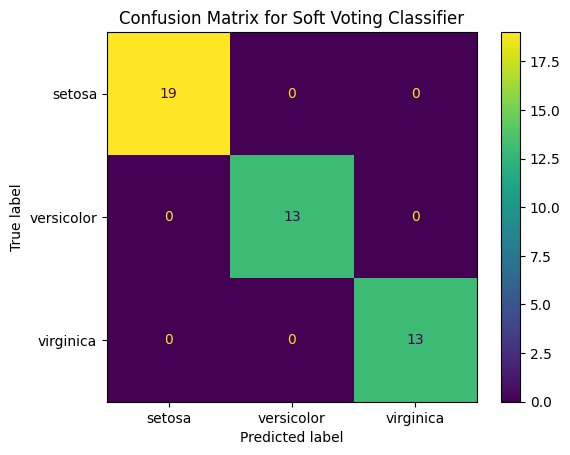

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix for the soft voting classifier
cm = confusion_matrix(y_test, y_pred_ensemble_soft)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix for Soft Voting Classifier")
plt.show()